## Excercise:  Pandas

### Loading & Visualising MNIST Dataset using Pandas & Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dataset/mnist_train.csv')

In [3]:
df.shape

(42000, 785)

CSV stand for Comma Seperated values files. They are like excel files.
This space indicates
It has 42000 rows and 785 columns

In [4]:
df.head(n=3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see the column name and the zeroth column denote the label.Each row is going to denote a digit. First column denote y and rest are x.


In [5]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


## Convert Data Frame Into Numpy Array

In [6]:
#To convert in numpy array
data = df.values

In [7]:
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(42000, 785)


#Seperate Y and X

For a particular y label all the element in rows denote the pixel value for the image

In [8]:
#X include All the  data excluding the zeroth column
#Y include All the element of only zeroth column
X = data[ : ,1 : ]
Y = data[ : ,0]

In [9]:
print(X.shape,Y.shape)

(42000, 784) (42000,)


 Here X is a 2-d matrix which contains pixel vale and Y is a label

##  Try to Visualise One Image

In [10]:
X[0].shape

(784,)

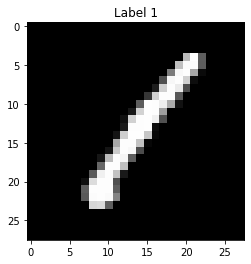

In [11]:
def drawImg(X,Y,i):
    plt.imshow(X[i].reshape(28,28),cmap='gray')
    plt.title("Label "+str(Y[i]))
    plt.show()
for i in range(1):
    drawImg(X,Y,i)

## Split DataSet
Whenever we are given a dataset, we generally keep a small part a dataset for testing & validation and rest of the dataset in training.

In [12]:
split = int(0.80* X.shape[0])
print(split)

33600


In [13]:
#First 33600 row willbe for training data.
#Here y is single column so only in row we distribute 
X_train,Y_train = X[:split,:],Y[:split]
X_test,Y_test = X[split: , :],Y[split: ]
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


Sometimes it might be possible that our data isnt randomly shuffles. All the thousand rows are zero and then one and so on. 

So if we do this only the last , second last label will go in testing.


### Randomization

In [14]:
import numpy as np
a = np.array([1,2,3,4,5])
np.random.shuffle(a)

print(a)

[1 4 2 5 3]


In [15]:
# Shuffle a 2-d Array
# See the rows are only shuffled but the values within rows aren't interchanged
a = np.array([[1,2,3],[5,6,7],[8,9,10]])
np.random.shuffle(a)
print(a)

[[ 5  6  7]
 [ 8  9 10]
 [ 1  2  3]]


So in case datasets are not randomly shuffled we can shuffle it first then divide it in X and Y. **I repeat first shuffle it then divide it into X and Y because X and Y are mapped with labels**

## Try to Plot a Visualisation

In matplotlib there is a concept of subplot. You can divide the big plotting area into small plotting area.

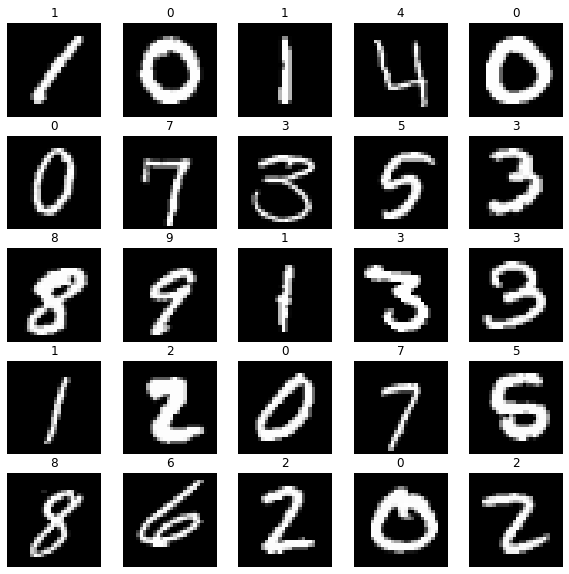

In [16]:
#5*5 grid we are making i.e 5 rows and 5 columns
# and index of first image will 1 so we add 1
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i].reshape(28,28),cmap='gray')
    plt.title(Y_train[i])
    plt.axis("off")

## If you dont want to do train and test split manually 

So for that we can use sklearn library . It is library function to do this and it return 4 things.


In [17]:
from sklearn.model_selection import train_test_split

XT,Xt,YT,Yt = train_test_split(X,Y,test_size=0.2,random_state=5)
print(XT.shape,YT.shape)
print(Xt.shape,Yt.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


If we want a consistent dataset for train and test we can use this random_state=5 .
So shuffling will be same type everytime. Kind of seed value used in random shuffling